In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        #print(os.path.join(dirname, filename))
        break


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report , auc , accuracy_score

import tensorflow as tf
from tensorflow import keras

from PIL import Image
import cv2
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,Dropout,Conv2D, Flatten,MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = "/content/drive/MyDrive/archive (14)/Train/Train"
train = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 1322 files belonging to 3 classes.


In [ ]:
path = "/content/drive/MyDrive/archive (14)/Test/Test"
test = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 150 files belonging to 3 classes.


In [ ]:
path = "/content/drive/MyDrive/archive (14)/Validation/Validation"
valid = image_dataset_from_directory(path, batch_size=32,
                                    image_size=(256,256),shuffle=True)

Found 60 files belonging to 3 classes.


In [ ]:
class_labels = train.class_names
class_labels

['Healthy', 'Powdery', 'Rust']

In [ ]:
print(len(train))
print(len(test))
print(len(valid))

42
5
2


In [ ]:
#Data Preprocessing

for image_batch,image_label in train.take(1):
    print(image_batch[0])
    print(class_labels[image_label[0].numpy()])

tf.Tensor(
[[[133.44336  181.44336  143.44336 ]
  [130.71875  178.71875  138.71875 ]
  [130.76465  178.76465  140.76465 ]
  ...
  [135.4375   193.07715  146.1582  ]
  [130.71875  189.74121  131.69629 ]
  [124.640625 186.64062  119.640625]]

 [[128.74121  176.74121  138.74121 ]
  [131.9375   179.9375   139.9375  ]
  [130.4375   178.4375   140.4375  ]
  ...
  [133.3623   191.3623   140.3623  ]
  [123.0625   185.0625   120.0625  ]
  [123.85742  185.85742  118.85742 ]]

 [[134.62402  182.62402  144.62402 ]
  [127.93457  175.93457  135.93457 ]
  [139.55176  187.55176  149.55176 ]
  ...
  [132.55762  191.55762  133.55762 ]
  [125.075195 187.0752   122.075195]
  [121.4209   183.4209   116.4209  ]]

 ...

 [[ 72.203125 128.20312   83.203125]
  [ 74.671875 125.671875  84.671875]
  [ 81.62988  131.62988   93.62988 ]
  ...
  [ 94.921875 136.92188   98.921875]
  [ 89.859375 136.85938   94.859375]
  [ 81.4668   129.4668    89.4668  ]]

 [[ 73.39551  125.39551   79.39551 ]
  [ 80.12012  131.27637   

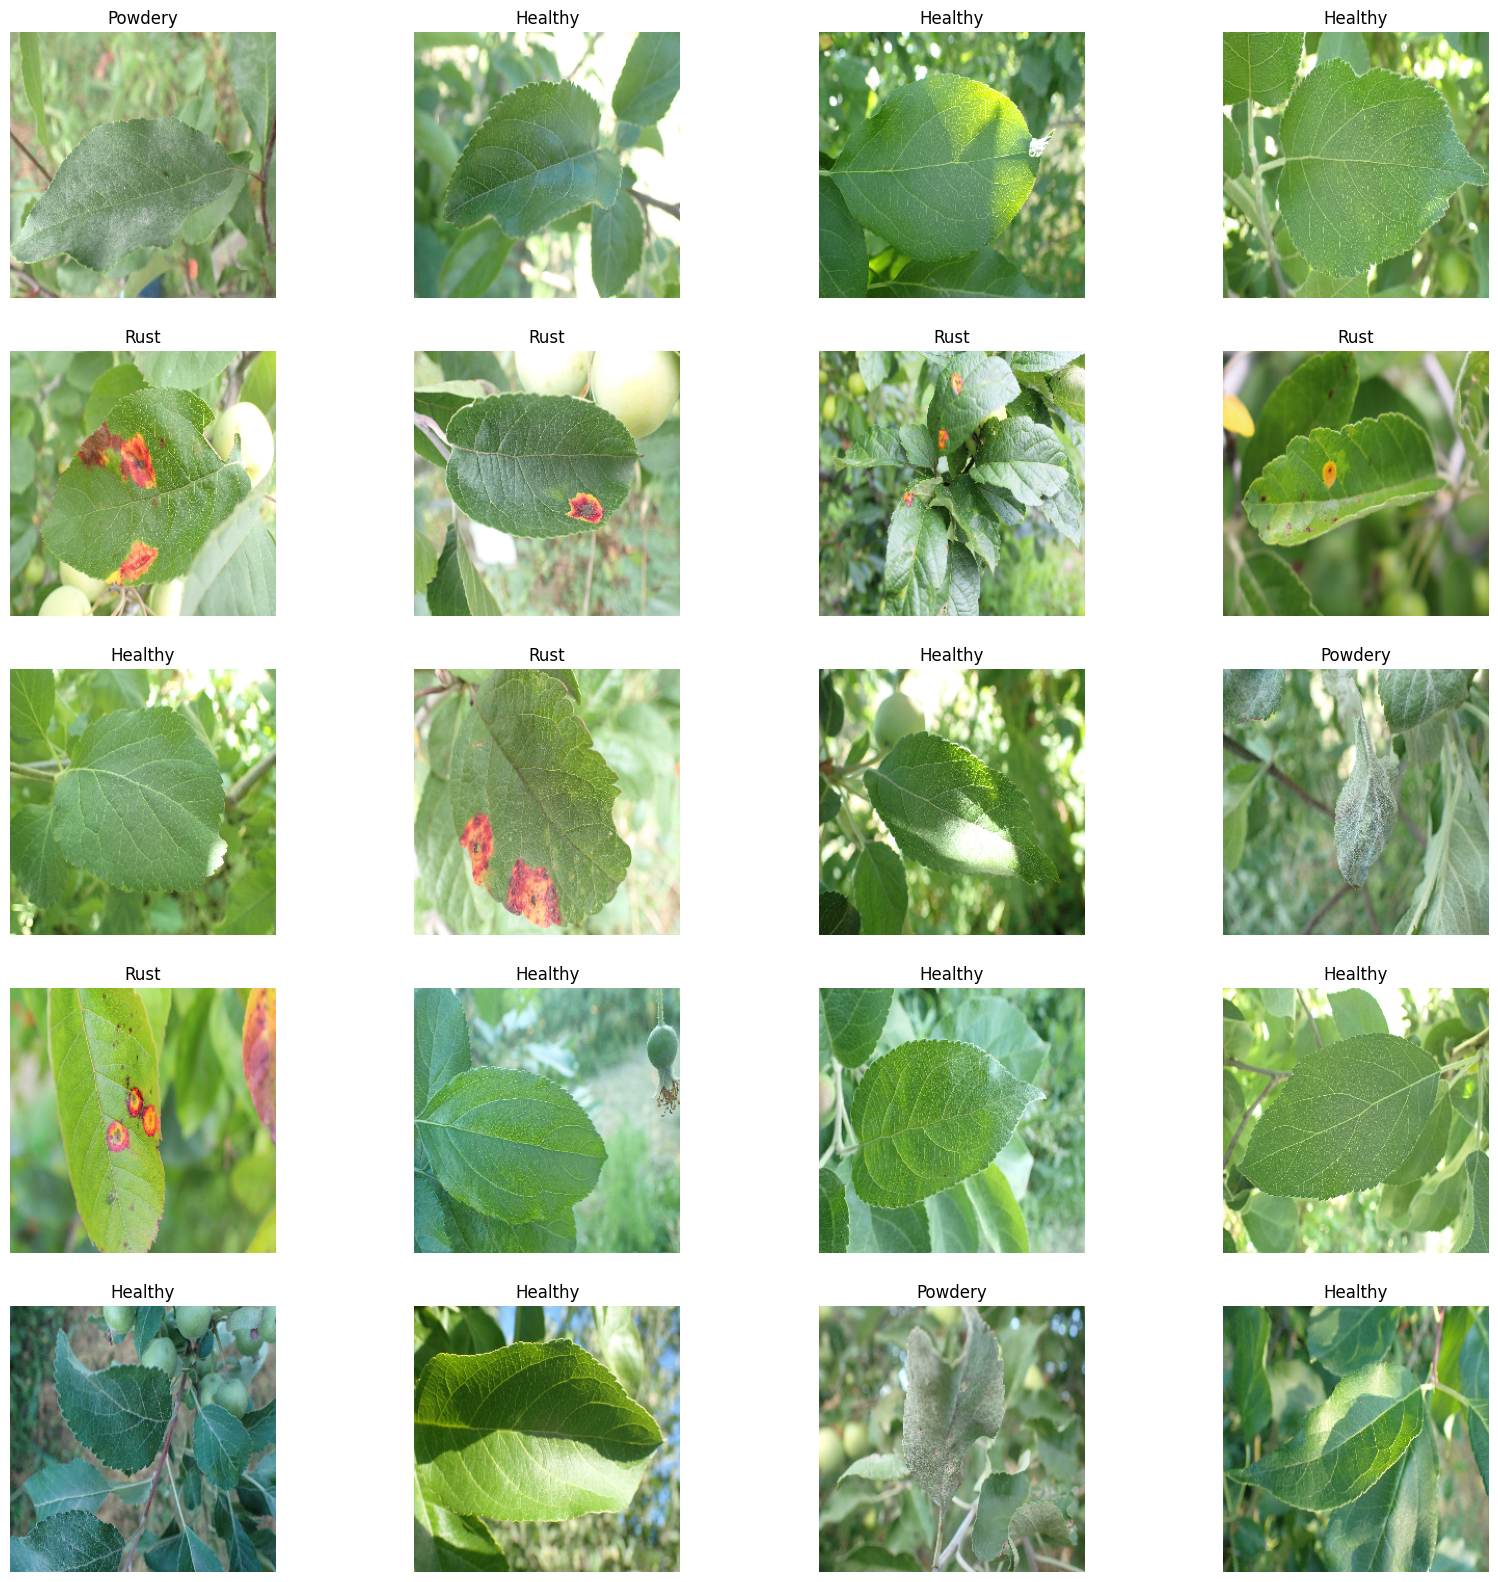

In [ ]:
#Train Image Data

plt.figure(figsize=(20,20))
for image_batch , image_label in train.take(1):
    for i in range(20):
        plt.subplot(5,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_labels[image_label[i].numpy()])
        plt.axis("off")

In [ ]:
#Resizing and Rescaling Images

resizing_and_rescaling = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(256,256),
    tf.keras.layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
#Data Augmentation

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomContrast(0.3),
    tf.keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.3),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2)
])

In [ ]:
#Create CNN Model

IMAGE_SIZE=256
CHANNELS=3
BATCH_SIZE=32
EPOCHS=10

input_shape=(BATCH_SIZE , IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

model= tf.keras.models.Sequential([
  resizing_and_rescaling,
  data_augmentation,
  # Convolution layer 1
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid',activation='relu',input_shape=input_shape),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 2
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 3
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Convolution layer 4
  tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3),strides=(1,1),padding='valid',activation='relu'),
  tf.keras.layers.MaxPool2D(pool_size=(2,2)),

  # Flatten Layers
  tf.keras.layers.Flatten(),

  # Dense layers
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.4),
  tf.keras.layers.Dense(units=500,activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(units=100,activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(units=3,activation='softmax')

])

model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                 

In [ ]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(train ,  batch_size=32 ,epochs=10,
                verbose=1,
                validation_data=valid) # epochs=10

Epoch 1/10
42/42 [==============================] - 378s 9s/step - loss: 1.0990 - accuracy: 0.3759 - val_loss: 0.9851 - val_accuracy: 0.4833
Epoch 2/10
42/42 [==============================] - 354s 8s/step - loss: 0.7899 - accuracy: 0.6127 - val_loss: 0.7415 - val_accuracy: 0.6667
Epoch 3/10
42/42 [==============================] - 349s 8s/step - loss: 0.7261 - accuracy: 0.6172 - val_loss: 0.6289 - val_accuracy: 0.6667
Epoch 4/10
42/42 [==============================] - 342s 8s/step - loss: 0.5286 - accuracy: 0.7943 - val_loss: 0.4277 - val_accuracy: 0.8500
Epoch 5/10
42/42 [==============================] - 347s 8s/step - loss: 0.5033 - accuracy: 0.8162 - val_loss: 0.4694 - val_accuracy: 0.7833
Epoch 6/10
42/42 [==============================] - 348s 8s/step - loss: 0.3746 - accuracy: 0.8714 - val_loss: 0.4163 - val_accuracy: 0.9000
Epoch 7/10
42/42 [==============================] - 332s 8s/step - loss: 0.4197 - accuracy: 0.8759 - val_loss: 0.3651 - val_accuracy: 0.8333
Epoch 8/10
42

In [ ]:
#Accuracy and loss on Train and Test

loss,acc = model.evaluate(train)
print("Loss on Train data:",loss)
print("Accuracy on Train data:",acc)

loss1,acc1 = model.evaluate(test)

print("Loss on Test data:",loss1)
print("Accuracy on Test data:",acc1)

42/42 [==============================] - 165s 4s/step - loss: 0.1282 - accuracy: 0.9607
Loss on Train data: 0.12817318737506866
Accuracy on Train data: 0.9606656432151794
5/5 [==============================] - 37s 1s/step - loss: 0.3164 - accuracy: 0.9067
Loss on Test data: 0.31638258695602417
Accuracy on Test data: 0.9066666960716248


In [ ]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

loss = history.history["loss"]
val_loss = history.history["val_loss"]

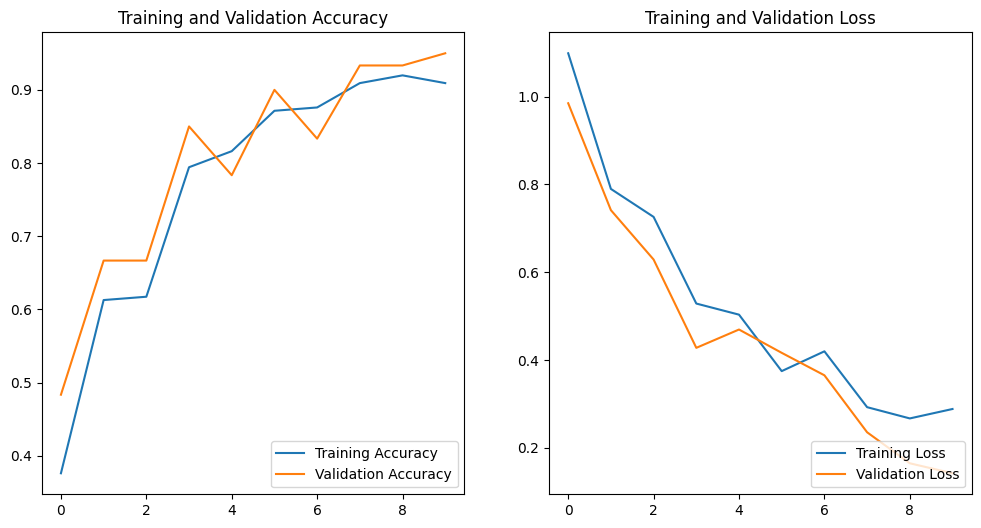

In [ ]:
EPOCHS=10
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label="Training Accuracy")
plt.plot(range(EPOCHS),val_acc, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

#plt.figure(figsize=(6,6))
plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label="Training Loss")
plt.plot(range(EPOCHS),val_loss, label="Validation Loss")
plt.legend(loc="lower right")
plt.title("Training and Validation Loss")
plt.show()

In [ ]:
#Image Predictions on Test Data

def Prediction(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array((images[i].numpy()))
    img_array = tf.expand_dims(img_array,0)     # create a batch

    predictions = model.predict(img_array)

    predicted_class = class_labels[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])),2)

    return predicted_class , confidence

1/1 [==============================] - 0s 59ms/step


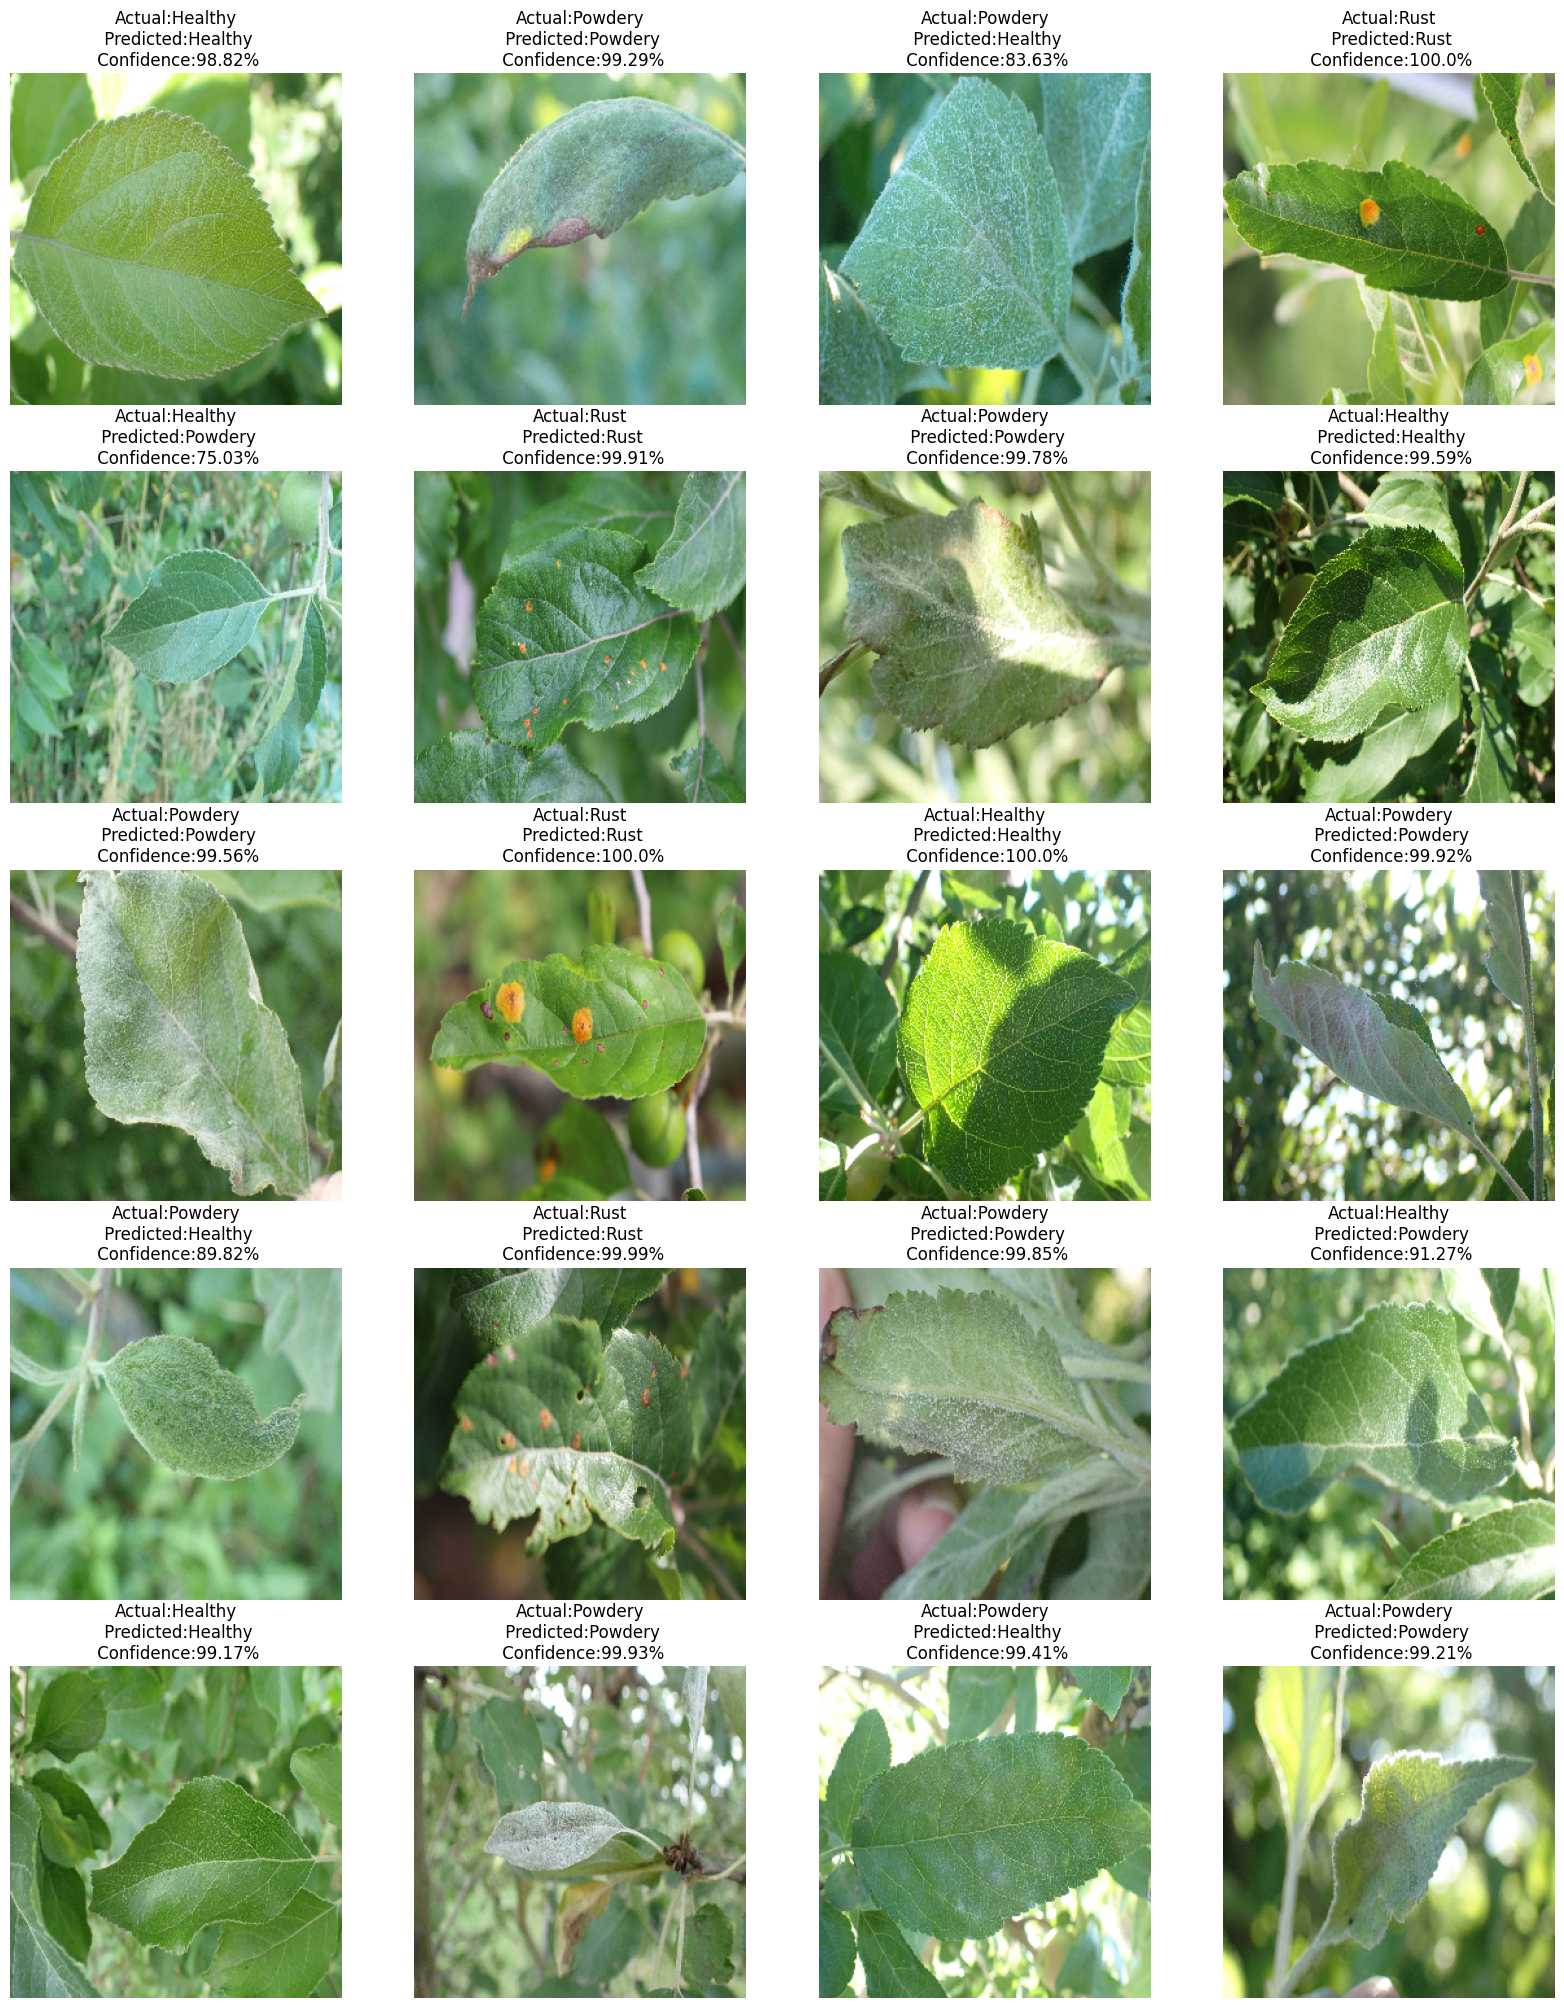

In [ ]:
plt.figure(figsize=(20,25))
for images , labels in test.take(1):
    for i in range(20):
        ax = plt.subplot(5,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        #plt.title(class_labels[labels[i]])


        predicted_class , confidence = Prediction(model,images[i].numpy())
        actual_class = class_labels[labels[i]]
        plt.title(f"Actual:{actual_class}\n Predicted:{predicted_class}\n Confidence:{confidence}%")
        plt.axis("off")